**Seeding for reproducibility**

In [21]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import models, layers

**Importing the dependencies**

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

**Data Curation**

In [27]:
data_dir = r"C:\Users\Ayush Ahlawat\OneDrive\Documents\SEM-4\ML-1\Project\Dataset\train_images"

In [28]:
print(os.listdir(data_dir))

['bacterial_leaf_blight', 'bacterial_leaf_streak', 'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart', 'downy_mildew', 'hispa', 'normal', 'tungro']


**Data Preprocessing**

(640, 480, 3)


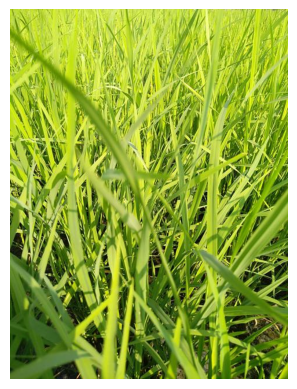

In [29]:
image_path = r'C:\Users\Ayush Ahlawat\OneDrive\Documents\SEM-4\ML-1\Project\Dataset\train_images\normal\100007.jpg'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [30]:
image_path = r'C:\Users\Ayush Ahlawat\OneDrive\Documents\SEM-4\ML-1\Project\Dataset\train_images\normal\100007.jpg'

# Read the image
img = mpimg.imread(image_path)

print(img)

[[[180 212  41]
  [181 213  44]
  [185 216  52]
  ...
  [202 223  66]
  [212 235  67]
  [205 229  57]]

 [[180 212  39]
  [182 214  43]
  [184 215  51]
  ...
  [211 235  79]
  [221 246  82]
  [201 227  58]]

 [[184 217  42]
  [187 219  46]
  [185 216  50]
  ...
  [217 241  91]
  [216 241  85]
  [176 202  41]]

 ...

 [[ 83 117  40]
  [ 83 117  40]
  [ 83 117  40]
  ...
  [ 84 123   8]
  [ 82 122   7]
  [ 81 122   4]]

 [[ 83 117  41]
  [ 83 117  41]
  [ 83 117  41]
  ...
  [ 83 122   7]
  [ 82 121   6]
  [ 81 120   5]]

 [[ 84 118  42]
  [ 84 118  42]
  [ 84 118  44]
  ...
  [ 82 121   4]
  [ 82 120   7]
  [ 80 118   5]]]


In [31]:
# Image Parameters
img_size = 224
batch_size = 32

**Train Test Split**

In [32]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [33]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 7136 images belonging to 10 classes.


In [34]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 1779 images belonging to 10 classes.


**Convolutional Neural Network**

In [35]:
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [36]:
# model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,797,962 (182.33 MB)

 Trainable params: 47,797,962 (182.33 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Model training**

In [38]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=5,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 390s 2s/step - accuracy: 0.2585 - loss: 3.4371 - val_accuracy: 0.5500 - val_loss: 1.3615
Epoch 2/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 376s 2s/step - accuracy: 0.6954 - loss: 0.9611 - val_accuracy: 0.6733 - val_loss: 1.0659
Epoch 3/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 376s 2s/step - accuracy: 0.9141 - loss: 0.2928 - val_accuracy: 0.7176 - val_loss: 1.0955
Epoch 4/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 469s 2s/step - accuracy: 0.9745 - loss: 0.1023 - val_accuracy: 0.7216 - val_loss: 1.2534
Epoch 5/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 377s 2s/step - accuracy: 0.9956 - loss: 0.0296 - val_accuracy: 0.7364 - val_loss: 1.5369


**Model Evaluation**

In [39]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
55/55 ━━━━━━━━━━━━━━━━━━━━ 25s 452ms/step - accuracy: 0.7361 - loss: 1.4861
Validation Accuracy: 73.81%


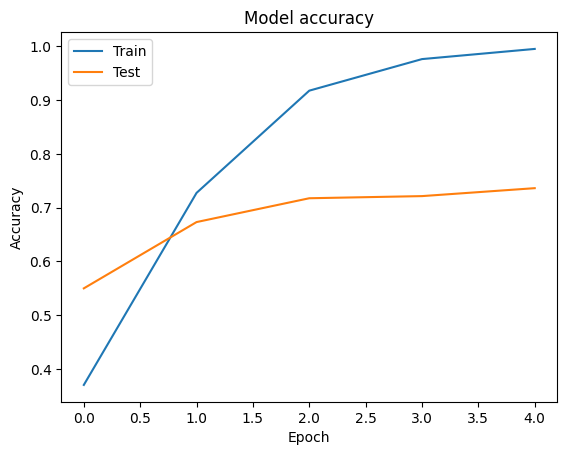

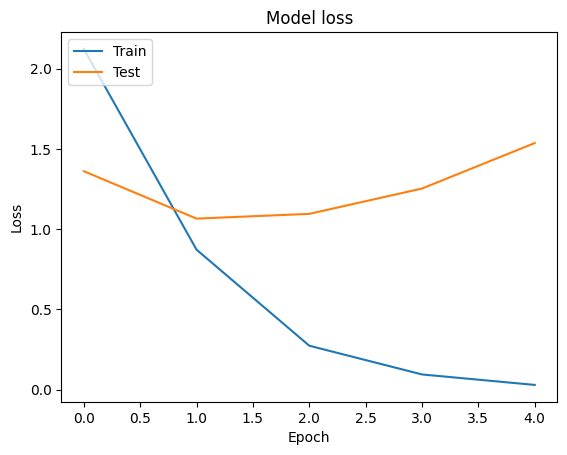

In [40]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Building a Predictive System**

In [41]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [42]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [43]:
class_indices

{0: 'bacterial_leaf_blight',
 1: 'bacterial_leaf_streak',
 2: 'bacterial_panicle_blight',
 3: 'blast',
 4: 'brown_spot',
 5: 'dead_heart',
 6: 'downy_mildew',
 7: 'hispa',
 8: 'normal',
 9: 'tungro'}

In [45]:
# # saving the class names as json file
# json.dump(class_indices, open('class_indices.json', 'w'))

In [47]:
# Example Usage
image_path = r'C:\Users\Ayush Ahlawat\OneDrive\Documents\SEM-4\ML-1\Project\valid_images\brown_spot\100354.jpg'
#image_path = '/content/test_blueberry_healthy.jpg'
#image_path = '/content/test_potato_early_blight.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
Predicted Class Name: brown_spot


**Save the model to Google drive or local**

In [48]:
model.save(r'C:\Users\Ayush Ahlawat\OneDrive\Documents\SEM-4\ML-1\Project\plant_disease_prediction_model.h5')

In [32]:
model.save('plant_disease_prediction_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
